<a href="https://colab.research.google.com/github/Yaseerkhan001/Mobile-Price-Range-Prediction/blob/main/Mobile_price_range_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Mobile price range prediction/Copy of data_mobile_price_range.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:

# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [9]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [10]:
df['px_height'][df[df.px_height == 0].index]

Series([], Name: px_height, dtype: float64)

In [11]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

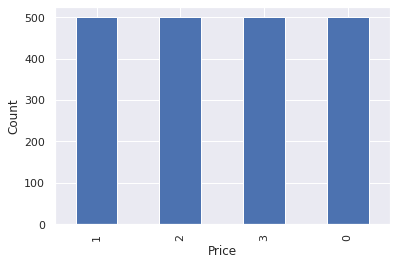

In [12]:
sns.set()
price_plt = df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('Price') 
plt.ylabel('Count')
plt.show() 

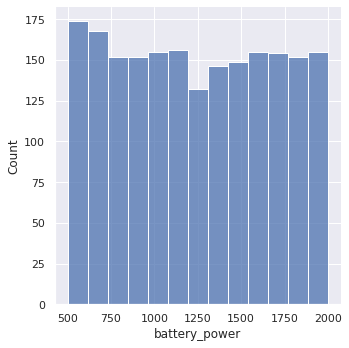

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(df["battery_power"])
plt.show()

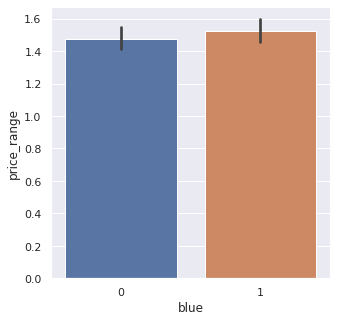

In [14]:
sns.barplot(y=df['price_range'],x=df['blue'])

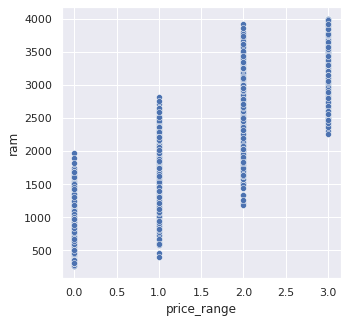

In [15]:
sns.scatterplot(data=df,x='price_range',y='ram')
plt.show()

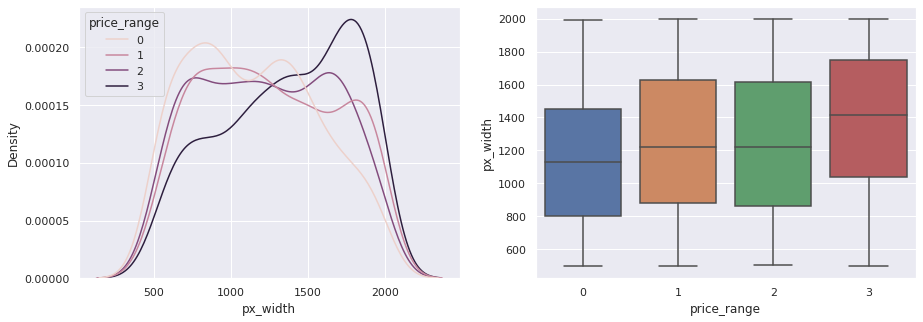

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

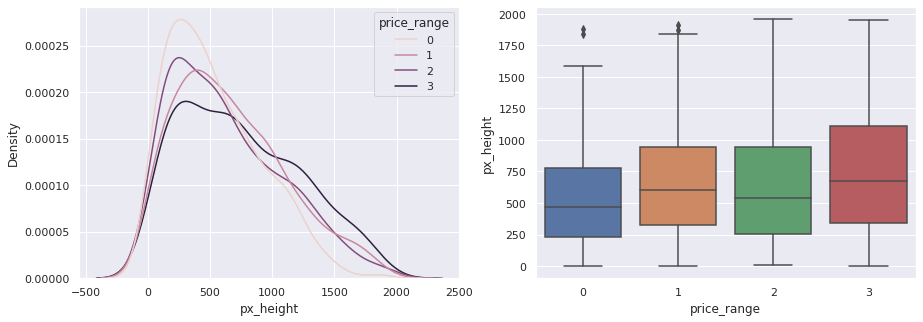

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

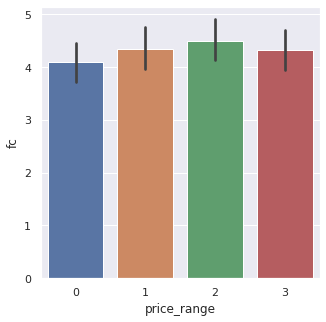

In [18]:
sns.barplot(data=df,x='price_range',y='fc')
plt.show()

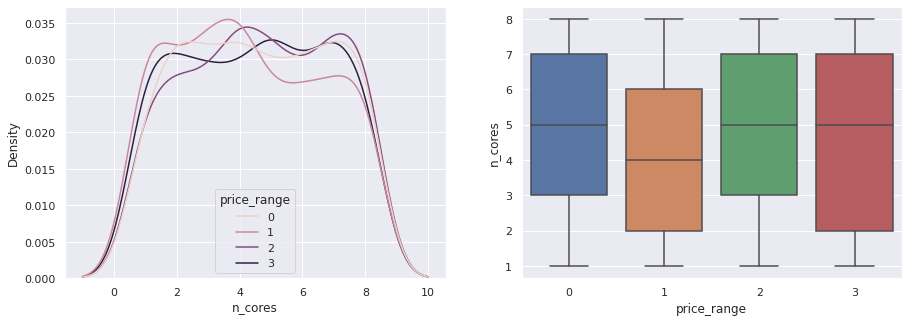

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

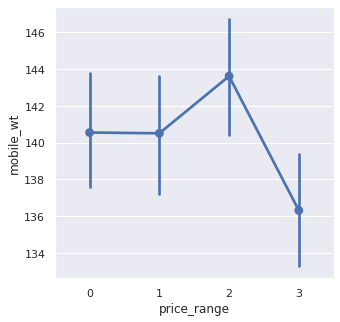

In [25]:
sns.pointplot(y="mobile_wt", x="price_range", data=df)
plt.show()

In [29]:
df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [27]:
binary_features = [ 'four_g', 'three_g']

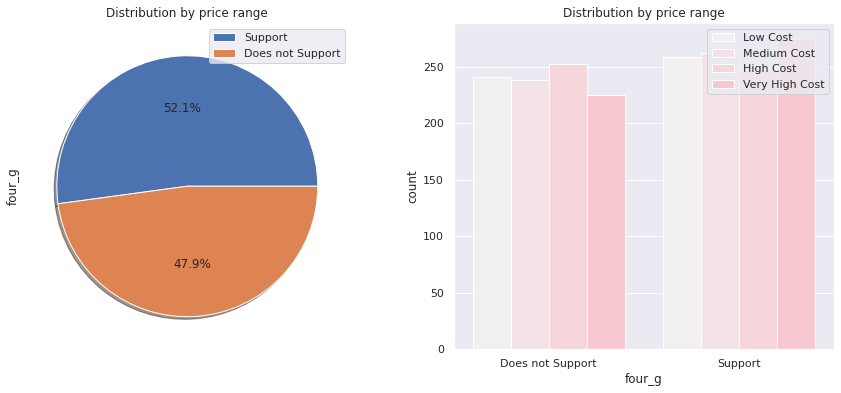

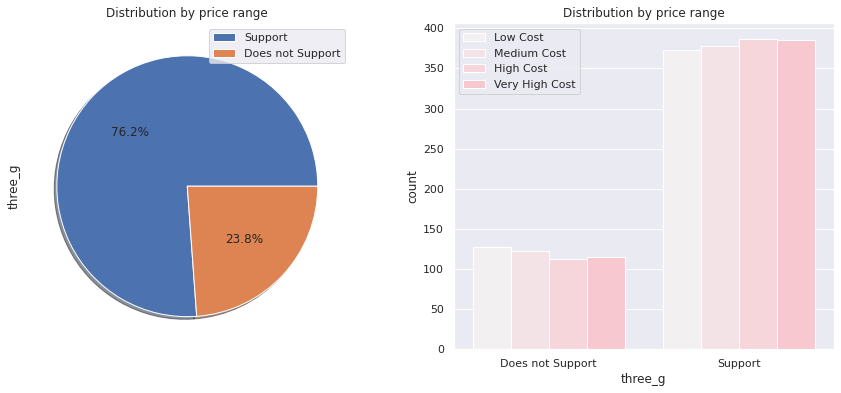

In [28]:
for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

feature 'three_g' play an important feature in prediction

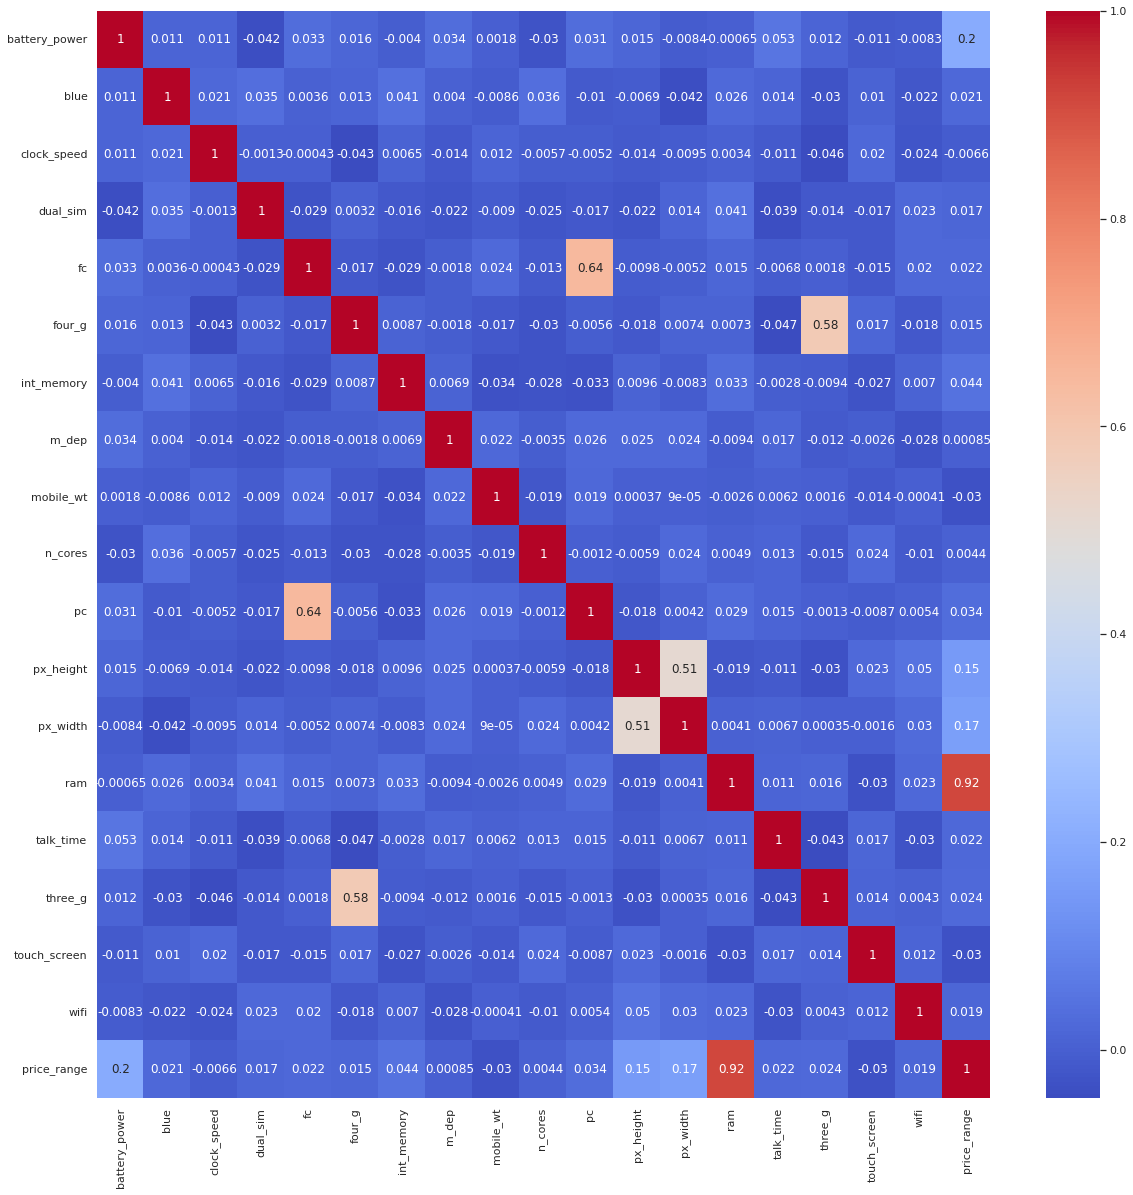

In [33]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

In [34]:
df['pixels'] = df['px_height']*df['px_width']
df.drop(['px_height','px_width'],axis='columns',inplace=True)

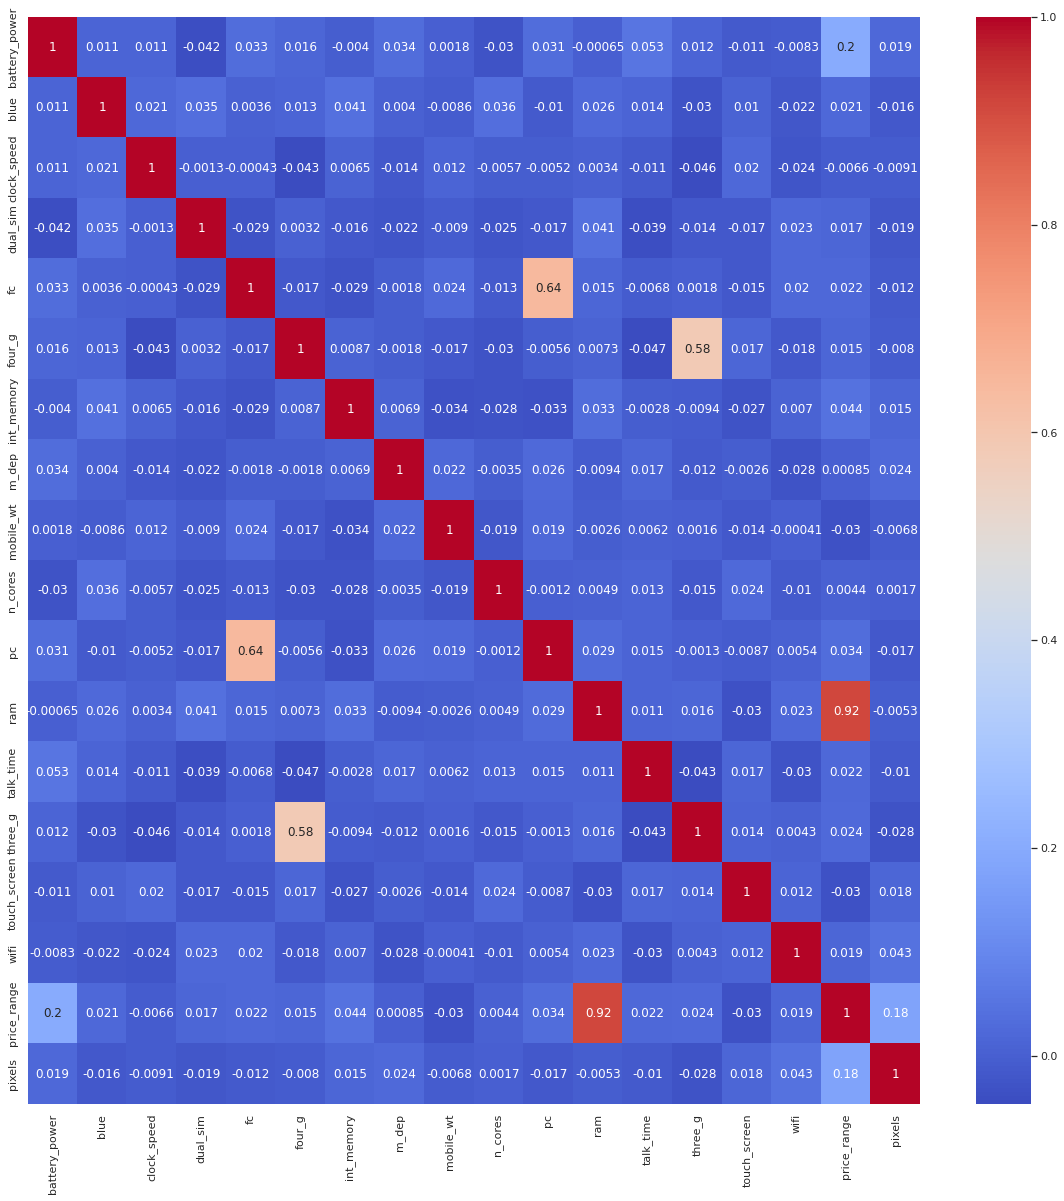

In [35]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

In [38]:
X = df.drop('price_range',axis=1)
y = df['price_range']

In [39]:
X.shape

(2000, 17)

In [40]:
y.shape

(2000,)

In [41]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_s = scale.fit_transform(X)  

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_s,y,test_size=0.2,random_state=42)

In [43]:
X_train.shape

(1600, 17)

In [44]:
y_train.shape

(1600,)

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [48]:
y_pred_test[0:11]

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0])

In [49]:
y_test[0:11]

1860    0
353     2
1333    1
905     3
1289    1
1273    1
938     2
1731    0
65      3
1323    1
56      0
Name: price_range, dtype: int64

In [60]:
from sklearn.metrics import classification_report
print('Classification report for LogisticRegression (test_set) ')
print(classification_report(y_pred_test,y_test))

Classification report for LogisticRegression (test_set) 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.86      0.87      0.86        90
           2       0.82      0.82      0.82        91
           3       0.93      0.93      0.93       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [59]:
print('Classification report for LogisticRegression (train_set) ')
print(classification_report(y_pred_train,y_train))

Classification report for LogisticRegression (train_set) 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       403
           1       0.89      0.89      0.89       410
           2       0.84      0.89      0.87       386
           3       0.96      0.93      0.94       401

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.92      0.91      0.91      1600



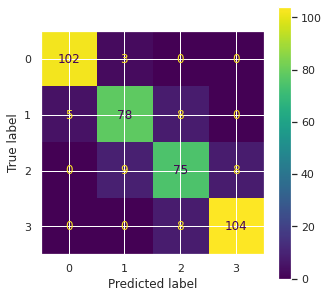

In [54]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_test,labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=lr.classes_)
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()

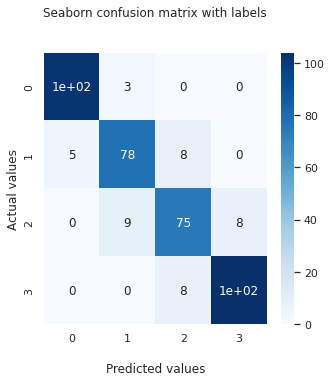

In [57]:
ax=sns.heatmap(cf_matrix,annot=True,cmap='Blues')
ax.set_title('Seaborn confusion matrix with labels\n\n')
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [63]:
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [64]:
y_pred = rf.predict(X_test)

In [65]:
y_pred[0:11]

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0])

In [66]:
y_test[0:11]

1860    0
353     2
1333    1
905     3
1289    1
1273    1
938     2
1731    0
65      3
1323    1
56      0
Name: price_range, dtype: int64

In [68]:
from sklearn.metrics import accuracy_score,roc_auc_score
score = accuracy_score(y_test,y_pred)
score

0.885

In [69]:
rf_y_pred_train = rf.predict(X_train)

In [75]:
score_train = accuracy_score(y_train,rf_y_pred_train)
score_train

1.0

In [78]:
print('Classification report for RandomForest (test_set) ')
print(classification_report(y_pred,y_test))

Classification report for RandomForest (test_set) 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.85      0.87      0.86        89
           2       0.84      0.79      0.81        98
           3       0.88      0.93      0.91       106

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.89      0.88       400



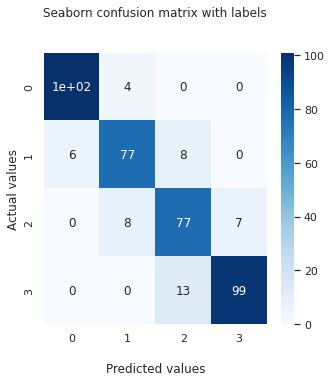

In [79]:
rf_cf_matrix = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(rf_cf_matrix,annot=True,cmap='Blues')
ax.set_title('Seaborn confusion matrix with labels\n\n')
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [85]:
feature_imp = pd.DataFrame({'Features':X.columns,'Score':rf.feature_importances_}).sort_values(by='Score',ascending=False).reset_index(drop=True)
feature_imp.head()


,Features,Score
0,ram,0.520763
1,battery_power,0.084010
2,pixels,0.079337
3,mobile_wt,0.046190
4,int_memory,0.042994


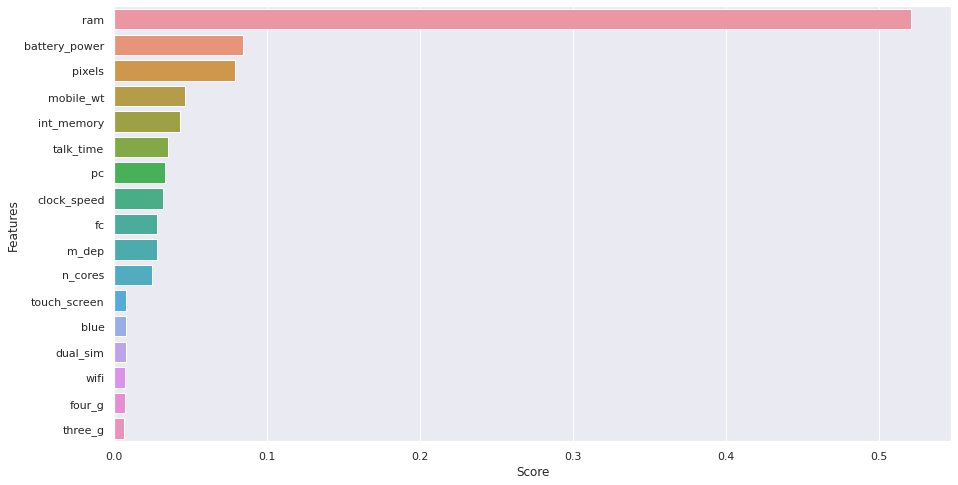

In [121]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_imp['Score'], y=feature_imp['Features'])
plt.show()

In [110]:
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[10, 20, 30]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
classifier.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy')

In [111]:
classifier.best_params_

{'max_depth': 20, 'n_estimators': 80}

In [113]:
classifier.best_score_

0.877

1.0

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=30, n_estimators=80)

In [115]:
y_train_pred = clsr.predict(X_train)
y_test_pred = clsr.predict(X_test)

In [116]:
accuracy_score(y_train,y_train_pred)

0.93125

In [117]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       395
           1       0.89      0.89      0.89       409
           2       0.91      0.89      0.90       408
           3       0.98      0.98      0.98       388

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [118]:
feature_importance = pd.DataFrame({'Feature':X.columns,'score':clsr.feature_importances_}).sort_values(by='score',ascending=False).reset_index(drop=True)

In [119]:
feature_importance

,Feature,score
0,ram,0.721638
1,battery_power,0.075498
2,pixels,0.064721
3,mobile_wt,0.024392
4,int_memory,0.022968
5,pc,0.015369
6,talk_time,0.015071
7,m_dep,0.012266
8,clock_speed,0.012230
9,fc,0.011735


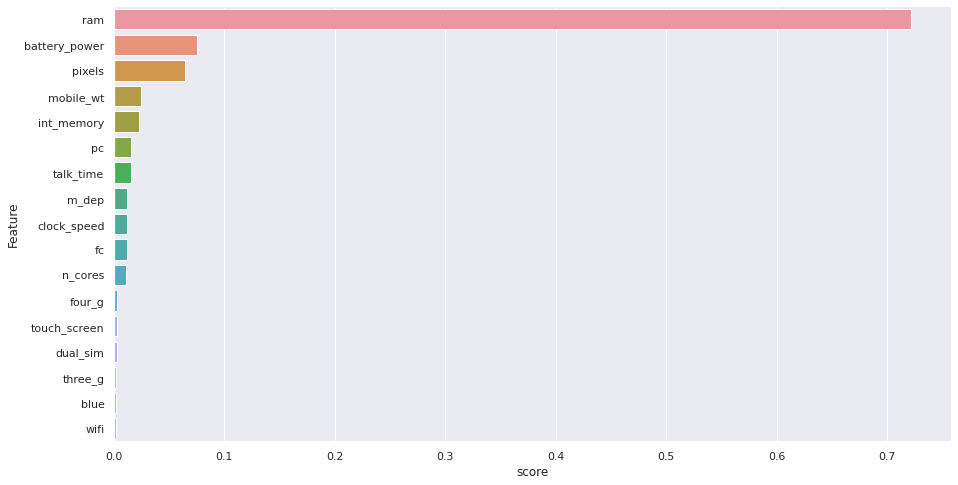

In [123]:
fig,ax = plt.subplots(figsize=(15,8))
ax=sns.barplot(x=feature_importance['score'],y=feature_importance['Feature'])
plt.show()

In [125]:
from xgboost import XGBClassifier

In [126]:
xgb = XGBClassifier(max_depth = 5, learning_rate=0.1)
xgb.fit(X_train,y_train)
XGBClassifier(max_depth = 5, objective = 'multi:softprob')


XGBClassifier(max_depth=5, objective='multi:softprob')

In [128]:
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

score=classification_report(y_test,y_test_pred_xgb)
print('Classification report for XGB (Testset)')
print(score)

Classification report for XGB (Testset)
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.84      0.89      0.86        91
           2       0.83      0.84      0.83        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [131]:
grid = GridSearchCV(xgb,param_grid={'max_depth':(5,10),'n_estimator':(10,150),'learning_rate':(1,0.1,0.01,2,2.01,0.001),'gamma':(1.5,1.8),'subsample':[0.3,0.2,0.1]},cv=5,scoring='accuracy',verbose=10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START gamma=1.5, learning_rate=1, max_depth=5, n_estimator=10, subsample=0.3
[CV 1/5; 1/144] END gamma=1.5, learning_rate=1, max_depth=5, n_estimator=10, subsample=0.3;, score=0.866 total time=   0.6s
[CV 2/5; 1/144] START gamma=1.5, learning_rate=1, max_depth=5, n_estimator=10, subsample=0.3
[CV 2/5; 1/144] END gamma=1.5, learning_rate=1, max_depth=5, n_estimator=10, subsample=0.3;, score=0.869 total time=   0.6s
[CV 3/5; 1/144] START gamma=1.5, learning_rate=1, max_depth=5, n_estimator=10, subsample=0.3
[CV 3/5; 1/144] END gamma=1.5, learning_rate=1, max_depth=5, n_estimator=10, subsample=0.3;, score=0.891 total time=   0.6s
[CV 4/5; 1/144] START gamma=1.5, learning_rate=1, max_depth=5, n_estimator=10, subsample=0.3
[CV 4/5; 1/144] END gamma=1.5, learning_rate=1, max_depth=5, n_estimator=10, subsample=0.3;, score=0.853 total time=   0.5s
[CV 5/5; 1/144] START gamma=1.5, learning_rate=1, max_depth=5, n_esti

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=5, objective='multi:softprob'),
             param_grid={'gamma': (1.5, 1.8),
                         'learning_rate': (1, 0.1, 0.01, 2, 2.01, 0.001),
                         'max_depth': (5, 10), 'n_estimator': (10, 150),
                         'subsample': [0.3, 0.2, 0.1]},
             scoring='accuracy', verbose=10)

In [133]:
y_train_grid_pred = grid.predict(X_train) 
y_test_grid_pred = grid.predict(X_test)

score = accuracy_score(y_train,y_train_grid_pred)
print('classification report for xgb')
print(score)

classification report for xgb
0.970625


[[ 98   7   0   0]
 [  6  81   4   0]
 [  0   9  77   6]
 [  0   0  12 100]]


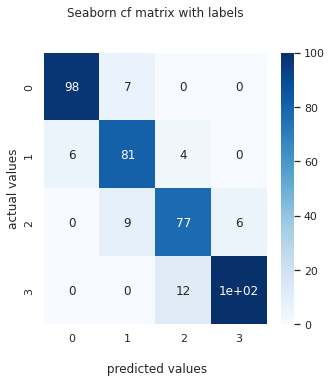

In [135]:
cf_matrix = confusion_matrix(y_test,y_test_pred_xgb)

print(cf_matrix)

ax = sns.heatmap(cf_matrix,annot= True, cmap= 'Blues')

ax.set_title("Seaborn cf matrix with labels\n\n")
ax.set_xlabel('\n predicted values')
ax.set_ylabel('actual values')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [137]:
score = classification_report(y_train,y_train_pred_xgb)
print("Classification report for XGB (train set)")
print(score)

Classification report for XGB (train set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

